In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('WorldCupData.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    901 non-null    int64 
 1   teamA   901 non-null    object
 2   teamB   901 non-null    object
 3   goalsA  901 non-null    int64 
 4   goalsB  901 non-null    int64 
 5   winner  899 non-null    object
dtypes: int64(3), object(3)
memory usage: 42.4+ KB


In [3]:
df.head()

,year,teamA,teamB,goalsA,goalsB,winner
0,1930,France,Mexico,4,1,teamA
1,1930,Argentina,France,1,0,teamA
2,1930,Chile,Mexico,3,0,teamA
3,1930,Chile,France,1,0,teamA
4,1930,Argentina,Mexico,6,3,teamA


In [4]:
df.sample(n=10)

,year,teamA,teamB,goalsA,goalsB,winner
749,2010,Portugal,Brazil,0,0,draw
670,2006,Italy,Ghana,2,0,teamA
803,2014,Argentina,Bosnia and Herzegovina,2,1,teamA
318,1982,Algeria,Austria,0,2,teamB
146,1962,West Germany,Switzerland,2,1,teamA
182,1966,Portugal,Hungary,3,1,teamA
788,2014,Japan,Greece,0,0,draw
62,1950,Spain,Chile,2,0,teamA
764,2010,Spain,Portugal,1,0,teamA
533,1998,France,Denmark,2,1,teamA


In [5]:
teams = np.unique(df[['teamA', 'teamB']].values)
len(teams)

87

In [11]:
gameCounter = {}
for team in teams:
    if team in df['teamA'].unique():
        countTeamA = (df.teamA == team).sum()
    if team in df['teamB'].unique():
        countTeamB = (df.teamB == team).sum()
    countOverall = countTeamA + countTeamB
    gameCounter.update({team : countOverall})
    
gameCounter = dict(sorted(gameCounter.items(), key=lambda item: item[1]))
gameCountList = list(gameCounter.items())
gameCountList[-15:]

[('South Korea', 34),
 ('Switzerland', 37),
 ('Germany', 47),
 ('Belgium', 48),
 ('Netherlands', 50),
 ('Sweden', 52),
 ('Mexico', 56),
 ('Uruguay', 56),
 ('West Germany', 62),
 ('Spain', 63),
 ('France', 66),
 ('England', 69),
 ('Argentina', 81),
 ('Italy', 83),
 ('Brazil', 109)]

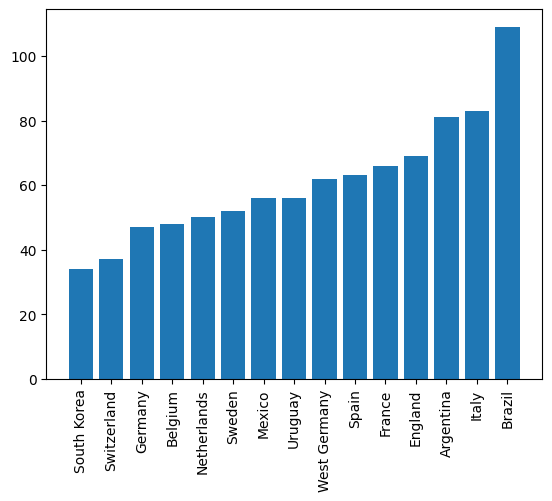

In [16]:
###SPLIT IT UP!!! {k:v for (k,v) in dict.items() if v > something}

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#plt.bar(*zip(*gameCounter.items()))
plt.bar(*zip(*gameCountList[-15:]))
plt.xticks(rotation=90)
plt.show()

In [ ]:
#consolidate countries


In [18]:
#if Team A = team & winner = team A --> +3   if draw --> +1   (log goals A)
#if Team B = team & winner = team B --> +3   if draw --> +1   (log goals B)
goalCounter = {}
for team in teams:
    if team in df['teamA'].unique():
        goalsTeamA = df.loc[df['teamA']==team,'goalsA'].sum()
    if team in df['teamB'].unique():
        goalsTeamB = df.loc[df['teamB']==team,'goalsB'].sum()
    goalsOverall = goalsTeamA + goalsTeamB
    goalCounter.update({team : goalsOverall})
    
goalCounter = dict(sorted(goalCounter.items(), key=lambda item: item[1]))
goalCounter = list(goalCounter.items())
goalCounter[-15:]

[('Yugoslavia', 55),
 ('Mexico', 57),
 ('Belgium', 68),
 ('Sweden', 80),
 ('Hungary', 86),
 ('Netherlands', 86),
 ('Uruguay', 87),
 ('England', 91),
 ('Germany', 95),
 ('Spain', 99),
 ('France', 120),
 ('Italy', 128),
 ('West Germany', 131),
 ('Argentina', 137),
 ('Brazil', 229)]

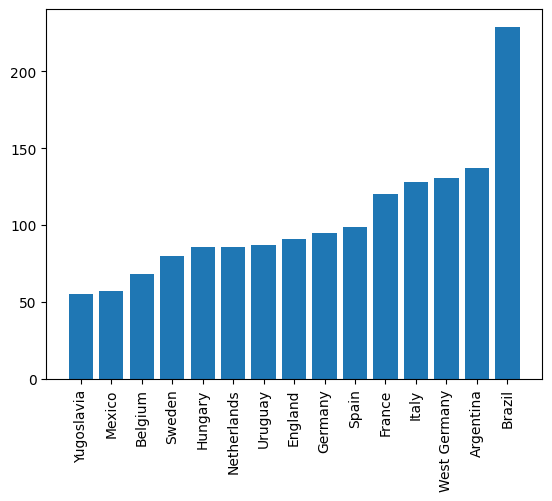

In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.bar(*zip(*goalCounter[-15:]))
plt.xticks(rotation=90)
plt.show()

In [43]:
pointsTeamA = 0
for entry in df.loc[df['teamA']=='Germany','winner']:
    if entry == 'teamA':
        pointsTeamA += 3
    if entry == 'draw':
        pointsTeamA += 1
    print(entry)
print (pointsTeamA)

teamA
teamA
teamA
teamA
draw
teamA
teamA
teamA
draw
teamA
teamA
teamB
teamA
draw
teamA
teamA
teamA
teamB
teamA
teamA
teamA
teamA
teamB
teamA
teamA
teamB
teamA
teamB
teamA
draw
teamA
teamA
teamB
teamA
76


In [27]:
#if Team A = team & winner = team A --> +3   if draw --> +1   (log goals A)
#if Team B = team & winner = team B --> +3   if draw --> +1   (log goals B)
pointCounter = {}
for team in teams:
    if team in df['teamA'].unique():
        pointsTeamA = 0
        for entry in df.loc[df['teamA']==team,'winner']:
            if entry == 'teamA':
                pointsTeamA += 3
            if entry == 'draw':
                pointsTeamA += 1
    if team in df['teamB'].unique():
        pointsTeamB = 0
        for entry in df.loc[df['teamB']==team,'winner']:
            if entry == 'teamB':
                pointsTeamB += 3
            if entry == 'draw':
                pointsTeamB += 1
    pointsOverall = pointsTeamA + pointsTeamB
    pointCounter.update({team : pointsOverall})
    
pointCounter= dict(sorted(pointCounter.items(), key=lambda item: item[1]))
pointCounter

{'Canada': 0,
 'China': 0,
 'El Salvador': 0,
 'Haiti': 0,
 'Iraq': 0,
 'Panama': 0,
 'Serbia and Montenegro': 0,
 'Togo': 0,
 'United Arab Emirates': 0,
 'Zaire': 0,
 'Bolivia': 1,
 'Iceland': 1,
 'Trinidad and Tobago': 1,
 'Angola': 2,
 'Egypt': 2,
 'Israel': 2,
 'Bosnia and Herzegovina': 3,
 'Czech Republic': 3,
 'Honduras': 3,
 'Jamaica': 3,
 'New Zealand': 3,
 'Saudia Arabia': 3,
 'Cuba': 4,
 'Mexcio': 4,
 'North Korea': 4,
 'Slovakia': 4,
 'Slovenia': 4,
 'Serbia': 6,
 'Wales': 6,
 'FR Yugoslavia': 7,
 'Greece': 7,
 'East Germany': 8,
 'Saudi Arabia': 8,
 'Norway': 9,
 'Ukraine': 9,
 'Australia': 10,
 'Iran': 10,
 'Ivory Coast': 10,
 'South Africa': 10,
 'Tunisia': 10,
 'Kuwait': 11,
 'Morocco': 11,
 'Algeria': 12,
 'Dutch East Indies': 12,
 'Senegal': 12,
 'Ecuador': 13,
 'Ghana': 14,
 'Northern Ireland': 14,
 'Republic of Ireland': 15,
 'Turkey': 16,
 'Russia': 17,
 'Peru': 18,
 'Bulgaria': 19,
 'Cameroon': 19,
 'Japan': 19,
 'Scotland': 19,
 'Costa Rica': 21,
 'Nigeria': 21,
 

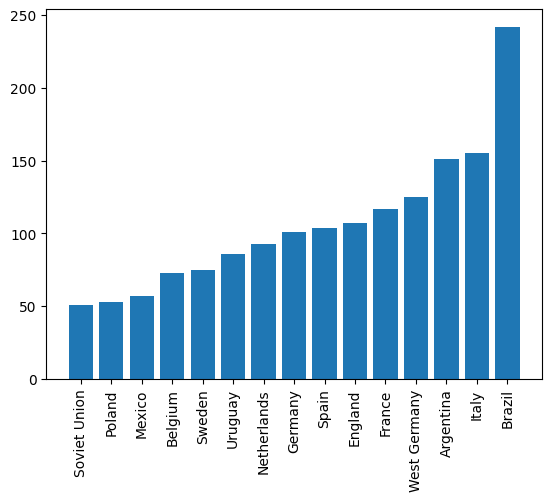

In [28]:
pointCounter = list(pointCounter.items())
plt.bar(*zip(*pointCounter[-15:]))
plt.xticks(rotation=90)
plt.show()